In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train-images-idx3-ubyte', 'train-labels-idx1-ubyte', 't10k-labels-idx1-ubyte', 'fashion-mnist_train.csv', 't10k-images-idx3-ubyte', 'fashion-mnist_test.csv']


In [113]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils


## Data Preparation

In [114]:
from sklearn.model_selection import train_test_split
from tensorflow.python import keras

img_rows, img_cols = 28, 28
num_classes = 10
batch_size = 128
num_classes = 10
epochs = 25

def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    
    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

In [115]:
# preparing the data for Training
fashion_train_data = "../input/fashion-mnist_train.csv"
fashion_train = np.loadtxt(fashion_train_data, skiprows=1, delimiter=',')
X_train, Y_train = prep_data(fashion_train)

# preparing the data for Testing
fashion_test_data = "../input/fashion-mnist_test.csv"
fashion_test = np.loadtxt(fashion_test_data, skiprows=1, delimiter=',')
x_test, y_test = prep_data(fashion_test)

## Model  Architecture

In [117]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout,MaxPooling2D

fashion_model = Sequential() 
fashion_model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(img_rows,img_cols,1)))
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)) )
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
fashion_model.add(Dropout(0.2))
fashion_model.add(Conv2D(10, 1, activation='relu'))
fashion_model.add(Conv2D(10, 9))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='relu'))
fashion_model.add(Dense(num_classes, activation='softmax'))

## Model Summary 

In [118]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
dropout_7 (Dropout)          (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 9, 9, 10)          330       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 1, 1, 10)          8110      
__________

## Defining the Loss Function for Model

In [119]:
fashion_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Training the Model on Fashion MNIST

In [120]:
visualize = fashion_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,validation_split = 0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 7s 136us/step - loss: 0.7644 - acc: 0.7083 - val_loss: 0.5197 - val_acc: 0.7938
Epoch 2/25
48000/48000 [==============================] - 6s 116us/step - loss: 0.4776 - acc: 0.8171 - val_loss: 0.4474 - val_acc: 0.8384
Epoch 3/25
48000/48000 [==============================] - 6s 117us/step - loss: 0.4136 - acc: 0.8469 - val_loss: 0.3985 - val_acc: 0.8532
Epoch 4/25
48000/48000 [==============================] - 6s 116us/step - loss: 0.3679 - acc: 0.8633 - val_loss: 0.3493 - val_acc: 0.8747
Epoch 5/25
48000/48000 [==============================] - 6s 117us/step - loss: 0.3340 - acc: 0.8783 - val_loss: 0.3166 - val_acc: 0.8880
Epoch 6/25
48000/48000 [==============================] - 6s 117us/step - loss: 0.3136 - acc: 0.8855 - val_loss: 0.2967 - val_acc: 0.8941
Epoch 7/25
48000/48000 [==============================] - 6s 116us/step - loss: 0.2933 - acc: 0.8916 - val_loss: 0.2870 - 

## Evaluating the Model

In [121]:
score = fashion_model.evaluate(x_test, y_test, verbose=0)
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

[0.24426693172454833, 0.9136]
Test loss: 0.24426693172454833
Test accuracy: 0.9136


## Visualization of the Results

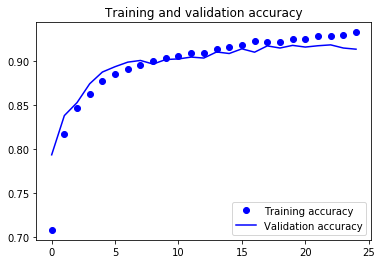

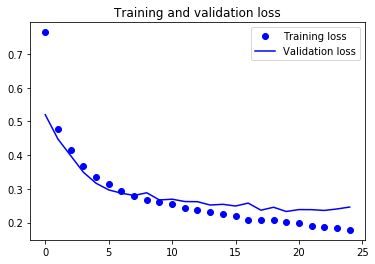

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = visualize.history['acc']
val_accuracy = visualize.history['val_acc']
loss = visualize.history['loss']
val_loss = visualize.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Classification Report

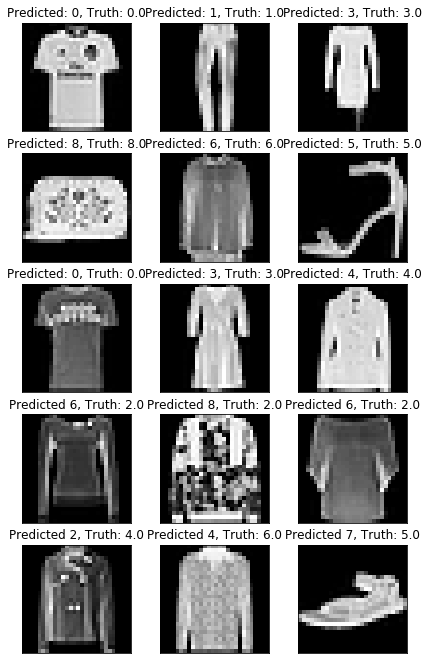

In [153]:
#get the predictions for the test data
predicted_classes = fashion_model.predict_classes(x_test)

#get the indices to be plotted
y_true = fashion_test[:, 0]
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 6 correct predictions
for i, correct in enumerate(correct[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_true[correct]))
    plt.xticks([])
    plt.yticks([])


# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect[:6]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_true[incorrect]))
    plt.xticks([])
    plt.yticks([])



In [133]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.85      0.89      0.87      1000
    Class 1       0.98      0.99      0.98      1000
    Class 2       0.93      0.82      0.87      1000
    Class 3       0.94      0.89      0.92      1000
    Class 4       0.82      0.93      0.87      1000
    Class 5       0.98      0.96      0.97      1000
    Class 6       0.77      0.74      0.75      1000
    Class 7       0.93      0.98      0.96      1000
    Class 8       0.97      0.98      0.97      1000
    Class 9       0.98      0.95      0.96      1000

avg / total       0.92      0.91      0.91     10000

